<a href="https://colab.research.google.com/github/imAdhi275/convolution-neural-network/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [4]:
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

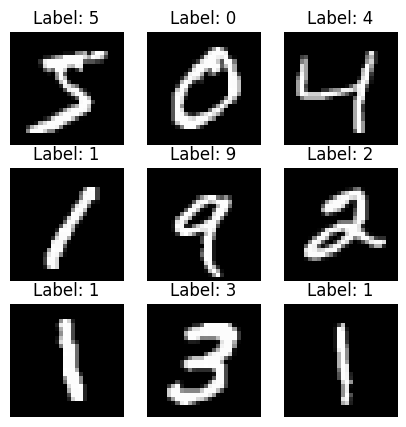

In [7]:
def plot_sample_images(images, labels, num_samples=9):
    plt.figure(figsize=(5, 5))
    for i in range(num_samples):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap="gray")
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()
plot_sample_images(x_train, y_train)

In [9]:
model = models.Sequential([
    Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 33ms/step - accuracy: 0.8850 - loss: 0.3680 - val_accuracy: 0.9850 - val_loss: 0.0592
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9843 - loss: 0.0522 - val_accuracy: 0.9860 - val_loss: 0.0501
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.9895 - loss: 0.0330 - val_accuracy: 0.9878 - val_loss: 0.0402
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9924 - loss: 0.0248 - val_accuracy: 0.9877 - val_loss: 0.0438
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.9902 - val_loss: 0.0361


In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9885 - loss: 0.0416
Test Accuracy: 0.99


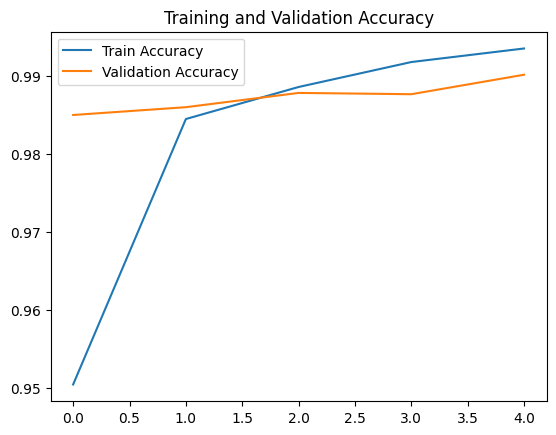

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


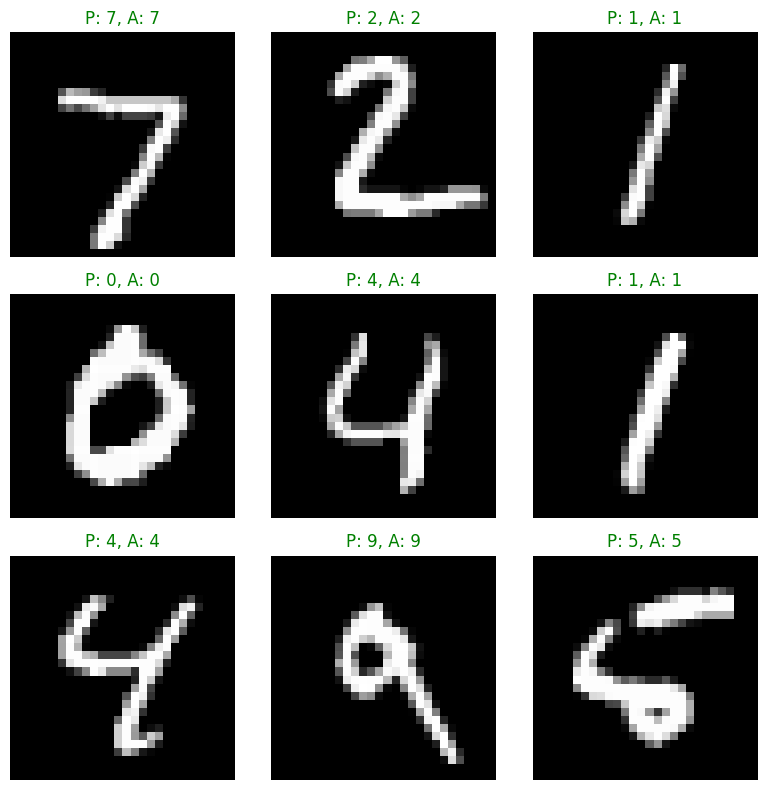

In [15]:
def display_predictions(images, labels, predictions, num_samples=9):
    plt.figure(figsize=(8, 8))
    for i in range(num_samples):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap="gray")
        predicted_label = tf.argmax(predictions[i]).numpy()
        actual_label = labels[i]
        color = 'green' if predicted_label == actual_label else 'red'
        plt.title(f"P: {predicted_label}, A: {actual_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

predictions = model.predict(x_test)
display_predictions(x_test, y_test, predictions, num_samples=9)

In [16]:
predicted_classes = tf.argmax(predictions, axis=1).numpy()
conf_matrix = confusion_matrix(y_test, predicted_classes)

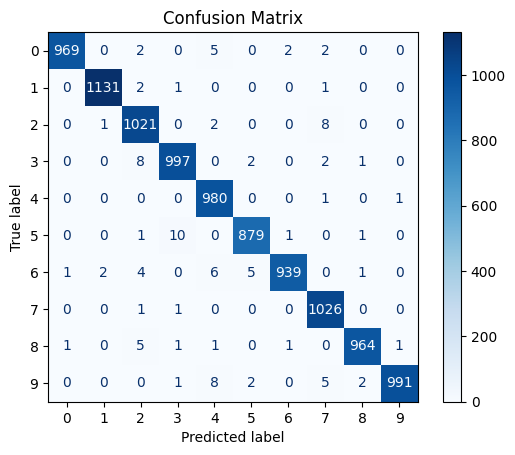

In [17]:
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
display.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [18]:
def analyze_mispredictions(conf_matrix):
    mispredictions = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    most_mispredicted_digit = np.argmax(mispredictions)
    print(f"Digit with most mispredictions: {most_mispredicted_digit}")
    print(f"Number of mispredictions: {mispredictions[most_mispredicted_digit]}")
    return most_mispredicted_digit

most_mispredicted_digit = analyze_mispredictions(conf_matrix)

Digit with most mispredictions: 6
Number of mispredictions: 19


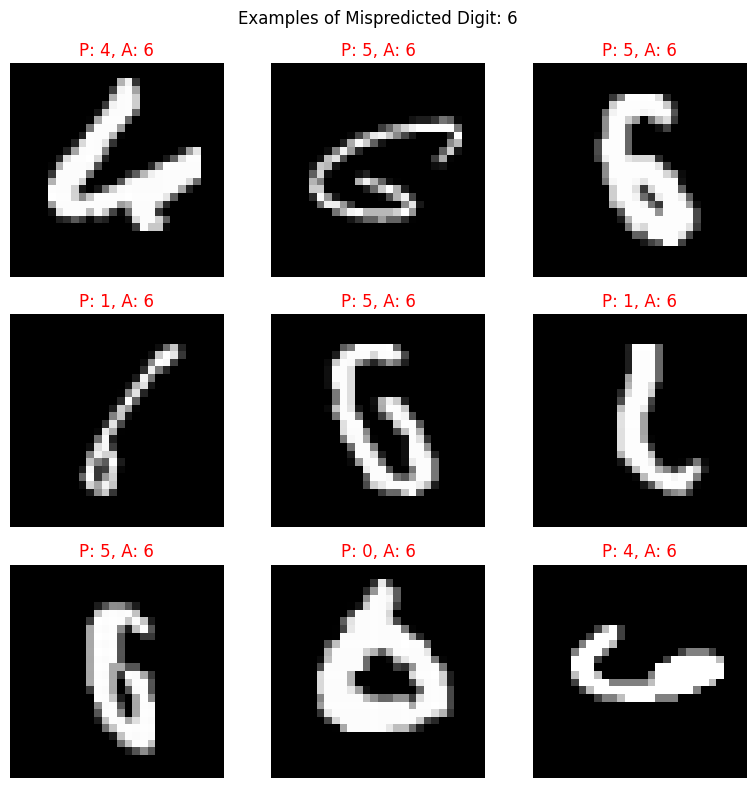

In [19]:
mispredicted_indices = [i for i, (true, pred) in enumerate(zip(y_test, predicted_classes))
                        if true == most_mispredicted_digit and true != pred]

plt.figure(figsize=(8, 8))
plt.suptitle(f"Examples of Mispredicted Digit: {most_mispredicted_digit}")
for i, index in enumerate(mispredicted_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[index].squeeze(), cmap="gray")
    plt.title(f"P: {predicted_classes[index]}, A: {y_test[index]}", color='red')
    plt.axis('off')
plt.tight_layout()
plt.show()